In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [21]:
# Define Custom Plot
def plot(x, y, y_hat, title="Linear Regression"):

	plt.figure(figsize=(16,8))
	plt.scatter(x, y, label='Data', c='#388fd8', s=6)
	plt.plot(x, y_hat, c='#ff7702', lw=3, label='Regression')
	plt.title(title, fontSize=14)
	plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
	plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
	plt.show()

In [22]:
# Load Data
df = pd.read_csv('./data2.csv')
X_train = df.x
y_train = df.t

df1 = pd.read_csv('./data3.csv')
X_test = df.x
y_test = df.t

In [23]:
# Define Gradient Descent

def gradient_descent(x, y, learning_rate=0.05, epoch=10):

	m, b = 0.2, 0.2 
	log, mse = [], []
	N = len(x) 

	for _ in range(epoch):

		f = y - (m*x + b)

		m -= learning_rate * (-2 * x.dot(f).sum() / N)
		b -= learning_rate * (-2 * f.sum() / N)

		log.append((m, b))
		mse.append(mean_squared_error(y, (m*x + b)))

	return m, b, log, mse

In [24]:
# Train GD model
m, b, log, mse = gradient_descent(X_train, y_train, learning_rate=0.01, epoch=100)

MSE: 0.6176944735921035


<ipython-input-21-6565ca7a6b80>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title(title, fontSize=14)
<ipython-input-25-360df0a7694d>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Gradient Descent Optimization', fontSize=14)


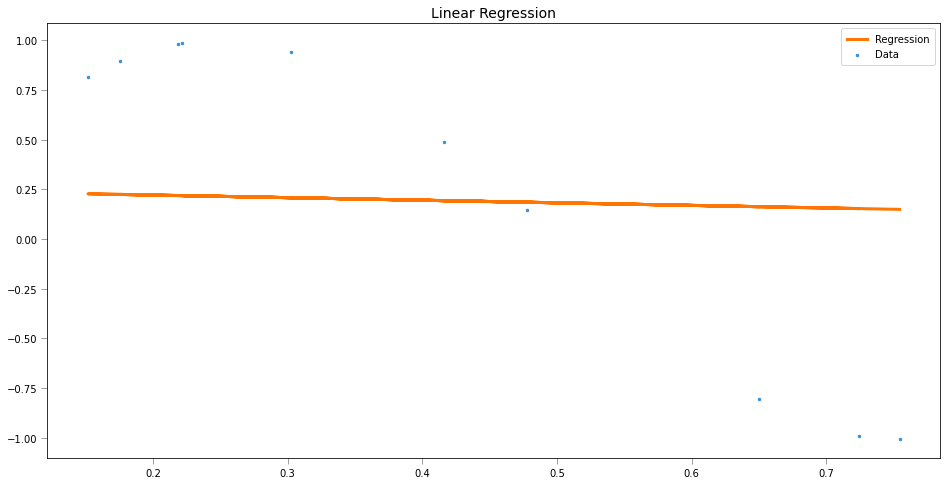

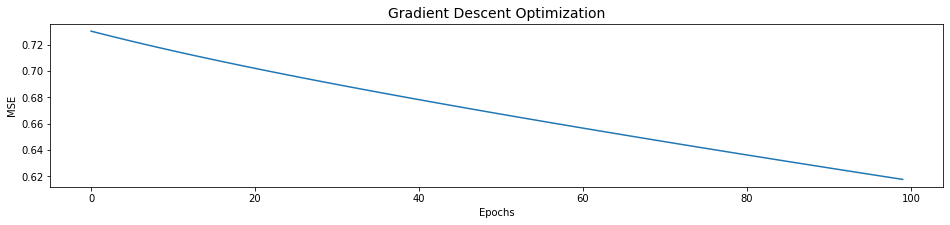

In [25]:
# Test GD model
y_hat = m*X_test + b

print("MSE:",mean_squared_error(y_test, y_hat))
plot(X_test, y_test, y_hat)

plt.figure(figsize=(16,3))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [26]:
# Define Stochastic Gradient Descent

def stochastic_gradient_descent(x, y, learning_rate=0.05, epoch=10, batch_size=1):

	m, b = 0.5, 0.5
	log, mse = [], [] 

	for _ in range(epoch):

		indexes = np.random.randint(0, len(x), batch_size) 

		X_ = np.take(x, indexes)
		ys = np.take(y, indexes)
		N = len(X_)

		f = ys - (m*X_ + b)

		m -= learning_rate * (-2 * X_.dot(f).sum() / N)
		b -= learning_rate * (-2 * f.sum() / N)

		log.append((m, b))
		mse.append(mean_squared_error(y, m*x+b))

	return m, b, log, mse

In [27]:
# Train model
m, b, log, mse = stochastic_gradient_descent(X_train, y_train, learning_rate=0.01, epoch=100, batch_size=2)

MSE: 0.6593183254932111


<ipython-input-21-6565ca7a6b80>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title(title, fontSize=14)
<ipython-input-28-93313850b3cb>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('SGD Optimization', fontSize=14)
<ipython-input-28-93313850b3cb>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Epochs', fontSize=11)
<ipython-input-28-93313850b3cb>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('MSE', fontSize=11)


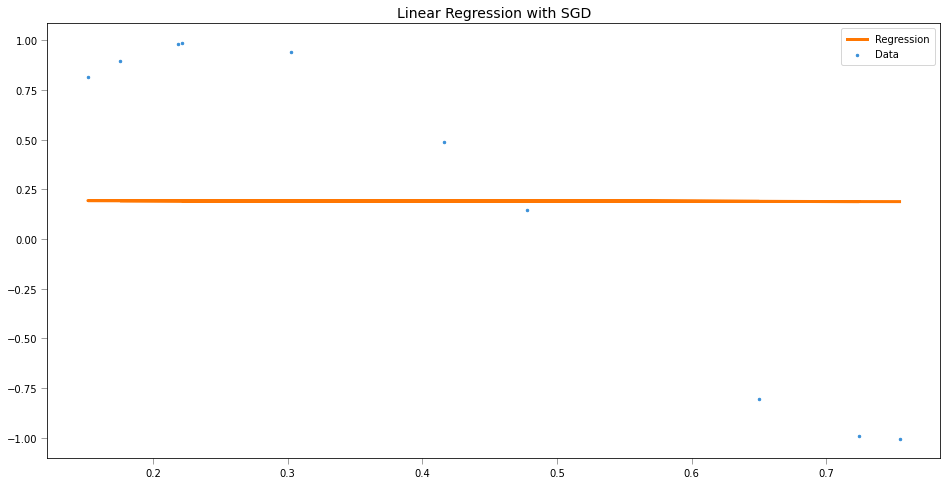

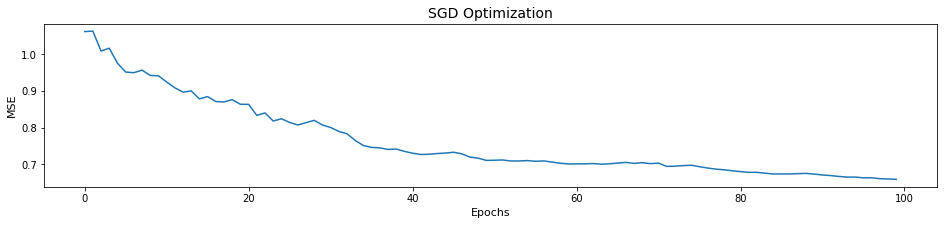

In [28]:
# Test

y_hat = m*X_test + b

print(f"MSE: {mean_squared_error(y_test, y_hat)}")
plot(X_test, y_test, y_hat, title="Linear Regression with SGD")

plt.figure(figsize=(16,3))
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization', fontSize=14)
plt.xlabel('Epochs', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()

<p dir="rtl">
همانطور که مشخص است وقتی از از روش SGD استفاد می شود، در همگرایی تابع هزینه به کمترین میزان خود، نوسان ایجاد می شود و این در حالی است که در خود روش GD به این علت که در هر مرحله همه داده ها دیده میشود و دقت روی مجموع داده ها در حال افزایش است تابع هدف به صورت یکنوا همگرا می شود.
از جهت احتمال همگرایی سریع تر روش اول SGD بیشتر است و نیز احتمال گیر کردن در بهینه محلی برایش کمتر است ولی در خود GD دقت روندی رو به رشد ولی کند تر و یکنوا به همگرایی می رسد.
</p>
